<a href="https://colab.research.google.com/github/szh141/UVA-AMF/blob/main/2D%20DFT/Reverse_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

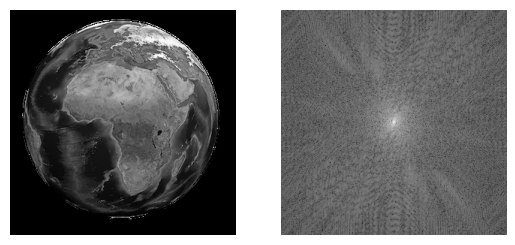

In [5]:
import numpy as np
import matplotlib.pyplot as plt
image_filename = '/content/drive/MyDrive/Colab images/Data/Earth.png' # odd row and column, blank on four sides

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis=2)  # Convert to grayscale
plt.set_cmap("gray")
ft = calculate_2dft(image)
plt.subplot(121)
plt.imshow(image)
plt.axis("off")
plt.subplot(122)
plt.imshow(np.log(abs(ft))) # FT plot has both real and imaginary part, we are plotting the magnitude
plt.axis("off")
plt.show()

Reverse Engineering The Fourier Transform Data

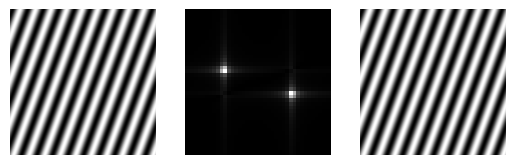

In [3]:
# inverse FT

import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
wavelength = 100
angle = np.pi/9
grating = np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
)
plt.set_cmap("gray")
plt.subplot(131)
plt.imshow(grating)
plt.axis("off")

# Calculate the Fourier transform of the grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)
plt.subplot(132)
plt.imshow(abs(ft))
plt.axis("off")
plt.xlim([480, 520])
plt.ylim([520, 480])

# Calculate the inverse Fourier transform of
# the Fourier transform
ift = np.fft.ifftshift(ft)
ift = np.fft.ifft2(ift)
ift = np.fft.fftshift(ift)
ift = ift.real  # Take only the real part
plt.subplot(133)
plt.imshow(ift)
plt.axis("off")
plt.show()

#Finding all the pairs of coordinates

You also define coords_left_half. This generator yields pairs of coordinates that cover the entire left-hand half of the array. It also includes the central column, which contains the centre pixel. Since points come in pairs that are symmetrical around the centre point in a Fourier transform, you only need to go through coordinates in one half of the array. You can then pair each point with its counterpart on the other side of the array.

In [7]:
# Array dimensions (array is square) and centre pixel
array_size = len(image)
centre = int((array_size - 1) / 2)

# Get all coordinate pairs in the left half of the array,
# including the column at the centre of the array (which
# includes the centre pixel)

coords_left_half = (
    (x, y) for x in range(array_size) for y in range(centre+1)
)

In [8]:
def calculate_distance_from_centre(coords, centre):
    # Distance from centre is √(x^2 + y^2)
    return np.sqrt(
        (coords[0] - centre) ** 2 + (coords[1] - centre) ** 2
    )

coords_left_half = sorted(
    coords_left_half,
    key=lambda x: calculate_distance_from_centre(x, centre)
)


You have the points in the left half of the Fourier transform in the correct order. Now, you need to match them with their corresponding point on the other side of the 2D Fourier transform. You can write a function for this:

In [9]:
def find_symmetric_coordinates(coords, centre):
    return (centre + (centre - coords[0]),
            centre + (centre - coords[1]))

#Using the 2D Fourier Transform in Python to Reconstruct The Image

Create an empty array, full of zeros, ready to be used for each pair of points
Iterate through the coordinates in coords_left_half. For each point, find its corresponding point on the right-hand side to complete the pair
For each pair of points, copy the values of those points from the Fourier transform into the empty array
Calculate the inverse Fourier transform of the array containing the pair of points. This gives the sinusoidal grating represented by these points
As you iterate through the pairs of points, you can add each sinusoidal grating you retrieve to the previous ones. This will gradually build up the image, starting from the low-frequency gratings up to the highest frequencies at the end:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
image_filename = '/content/drive/MyDrive/Colab images/Data/Earth.png' # odd row and column, blank on four sides

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)
def calculate_2dift(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

def calculate_distance_from_centre(coords, centre):
    # Distance from centre is √(x^2 + y^2)
    return np.sqrt(
        (coords[0] - centre) ** 2 + (coords[1] - centre) ** 2
    )
def find_symmetric_coordinates(coords, centre):
    return (centre + (centre - coords[0]),
            centre + (centre - coords[1]))

def display_plots(individual_grating, reconstruction, idx):
    plt.subplot(121)
    plt.imshow(individual_grating)
    plt.axis("off")
    plt.subplot(122)
    plt.imshow(reconstruction)
    plt.axis("off")
    plt.suptitle(f"Terms: {idx}")
    plt.pause(0.01)

# Read and process image
image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis=2)  # Convert to grayscale

# Array dimensions (array is square) and centre pixel
array_size = len(image)
centre = int((array_size - 1) / 2)

# Get all coordinate pairs in the left half of the array,
# including the column at the centre of the array (which
# includes the centre pixel)
coords_left_half = (
    (x, y) for x in range(array_size) for y in range(centre+1)
)
# Sort points based on distance from centre
coords_left_half = sorted(
    coords_left_half,
    key=lambda x: calculate_distance_from_centre(x, centre)
)
plt.set_cmap("gray")
ft = calculate_2dft(image)
# Show grayscale image and its Fourier transform
plt.subplot(121)
plt.imshow(image)
plt.axis("off")
plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.axis("off")
plt.pause(2)

# Reconstruct image
fig = plt.figure()

# Step 1
# Set up empty arrays for final image and
# individual gratings
rec_image = np.zeros(image.shape)
individual_grating = np.zeros(
    image.shape, dtype="complex"
)
idx = 0




# Step 2
for coords in coords_left_half:
    # Central column: only include if points in top half of
    # the central column
    if not (coords[1] == centre and coords[0] > centre):
        idx += 1
        symm_coords = find_symmetric_coordinates(
            coords, centre
        )
        # Step 3
        # Copy values from Fourier transform into
        # individual_grating for the pair of points in
        # current iteration
        individual_grating[coords] = ft[coords]
        individual_grating[symm_coords] = ft[symm_coords]
        # Step 4
        # Calculate inverse Fourier transform to give the
        # reconstructed grating. Add this reconstructed
        # grating to the reconstructed image
        rec_grating = calculate_2dift(individual_grating)
        rec_image += rec_grating
        # Clear individual_grating array, ready for
        # next iteration
        individual_grating[coords] = 0
        individual_grating[symm_coords] = 0
        display_plots(rec_grating, rec_image, idx)



plt.show()